In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the dataset , identify basic details of it , and setting the name column as index

In [167]:
employee=pd.read_csv(r"C:\Users\APJ\Downloads\employee.csv",index_col='name')#using index_col we can set the name col as index

In [168]:
employee

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [169]:
employee.shape

(9, 6)

In [170]:
employee.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [171]:
employee.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [172]:
for col in employee:
    print(employee[col].unique())

[45. nan 32. 30. 54. 23.]
[   nan 16000. 35000. 65000. 42000. 62000. 52000. 98000.]
[nan 'F' 'M']
['Operations' 'Finance' 'Sales']
['G3' 'G0' 'G2' 'G4']
[723 520 674 556 711 649  53 901 709]


## Select the rows for Jack Morgan and Josh Willls

In [173]:
employee.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## Select data for Sales and Finance

In [174]:
employee.loc[employee['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## Employees with more than 700 Performance Score

In [175]:
a=employee.performance_score>700
type(a)
a=pd.DataFrame(a)

In [176]:
b=employee['performance_score']
b

name
Allen Smith      723
S Kumar          520
Jack Morgan      674
Ying Chin        556
Dheeraj Patel    711
Satyam Sharma    649
James Authur      53
Josh Wills       901
Leo Duck         709
Name: performance_score, dtype: int64

In [177]:
a.insert(1,'perfomance_score',b)


In [178]:
a.loc[a['performance_score'].isin([True])]


,performance_score,perfomance_score
name,,
Allen Smith,True,723
Dheeraj Patel,True,711
Josh Wills,True,901
Leo Duck,True,709


##  Employee who has more than 500 and less than 700 performance score

In [179]:
(employee.performance_score>500) & (employee.performance_score<700)

name
Allen Smith      False
S Kumar           True
Jack Morgan       True
Ying Chin         True
Dheeraj Patel    False
Satyam Sharma     True
James Authur     False
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool

## Check and Handle the missing values in the dataset

In [180]:
new_employee=[]
new_employee

[]

In [181]:
employee.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [182]:
employee.describe()


,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [183]:
employee.median(numeric_only=True)

age                     45.0
income               52000.0
performance_score      674.0
dtype: float64

In [184]:
employee

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


###### Handling NaN in Age column

In [185]:
#For filling the age of S Kumar I am taking an educated guess according to her grade and income

new_employee=employee.fillna({'age':20},limit=1)


In [186]:
# In the case of age of Satyam Sharma, I'm filling the null value using the mean of age

new_employee=new_employee.fillna({'age':new_employee['age'].mean()},limit=1)


In [187]:
new_employee
new_employee.round(0)

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,20.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,38.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [188]:
new_employee

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000,NaN,NaN,Operations,G3,723
S Kumar,20.000,16000.0,F,Finance,G0,520
Jack Morgan,32.000,35000.0,M,Finance,G2,674
Ying Chin,45.000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000,42000.0,F,Operations,G2,711
Satyam Sharma,37.875,62000.0,NaN,Sales,G3,649
James Authur,54.000,NaN,F,Operations,G3,53
Josh Wills,54.000,52000.0,F,Finance,G3,901
Leo Duck,23.000,98000.0,M,Sales,G4,709


###### Handling in NaN Income column

In [189]:
#In the case of null values in income, I'm using the mean of income column

new_employee=new_employee.fillna({'income':new_employee['income'].mean()},limit=2)

In [190]:
new_employee.round(0)

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.0,NaN,Operations,G3,723
S Kumar,20.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,38.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52857.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


###### Handling in NaN Gender column

In [191]:
#The null values in gender column can be filled logicaly by looking at the name of employees, both Allen Smith and Satyam Sharma are the names of Male Employees

new_employee=new_employee.fillna({'gender':'M'},limit=2)

In [192]:
new_employee

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000,52857.142857,M,Operations,G3,723
S Kumar,20.000,16000.000000,F,Finance,G0,520
Jack Morgan,32.000,35000.000000,M,Finance,G2,674
Ying Chin,45.000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000,42000.000000,F,Operations,G2,711
Satyam Sharma,37.875,62000.000000,M,Sales,G3,649
James Authur,54.000,52857.142857,F,Operations,G3,53
Josh Wills,54.000,52000.000000,F,Finance,G3,901
Leo Duck,23.000,98000.000000,M,Sales,G4,709


In [193]:
new_employee.isnull().sum()
#We have dealt with all the null values

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

## Check and handle outliers in performance score using Percentiles(IQR)

<AxesSubplot:ylabel='performance_score'>

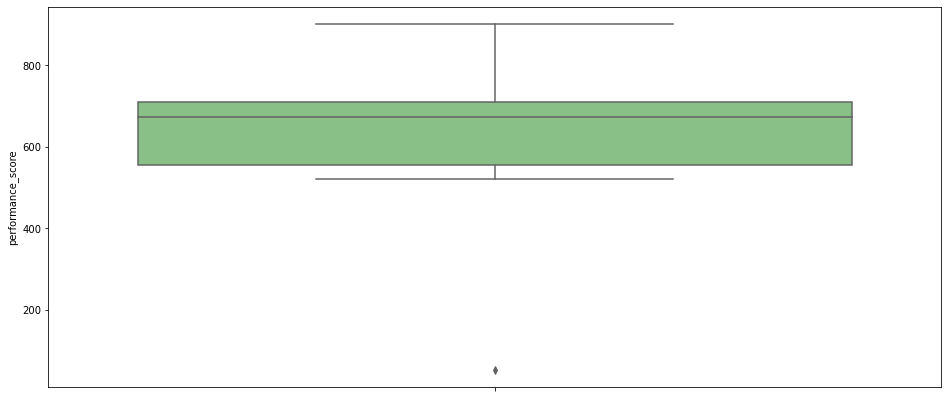

In [194]:
plt.figure(figsize=(16,7))
sns.boxplot(y='performance_score',data=new_employee,palette='Accent')

In [195]:
Q1=new_employee.performance_score.quantile(0.25)
Q3=new_employee.performance_score.quantile(0.75)
print(Q1,Q3)

556.0 711.0


In [196]:
IQR=Q3-Q1
IQR

155.0

In [197]:
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
print(LL,UL)

323.5 943.5


In [198]:
outliers=new_employee[(new_employee.performance_score<LL) | (new_employee.performance_score>UL)]
outliers

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52857.142857,F,Operations,G3,53


In [199]:
new_employees2=new_employee
new_employees2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000,52857.142857,M,Operations,G3,723
S Kumar,20.000,16000.000000,F,Finance,G0,520
Jack Morgan,32.000,35000.000000,M,Finance,G2,674
Ying Chin,45.000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000,42000.000000,F,Operations,G2,711
Satyam Sharma,37.875,62000.000000,M,Sales,G3,649
James Authur,54.000,52857.142857,F,Operations,G3,53
Josh Wills,54.000,52000.000000,F,Finance,G3,901
Leo Duck,23.000,98000.000000,M,Sales,G4,709


In [200]:
new_employees2["performance_score"] = np.where(new_employees2["performance_score"]> UL, UL,
                        np.where(new_employees2["performance_score"]< LL, LL,
                          new_employees2["performance_score"]))

In [202]:
new_employees2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000,52857.142857,M,Operations,G3,723.0
S Kumar,20.000,16000.000000,F,Finance,G0,520.0
Jack Morgan,32.000,35000.000000,M,Finance,G2,674.0
Ying Chin,45.000,65000.000000,F,Sales,G3,556.0
Dheeraj Patel,30.000,42000.000000,F,Operations,G2,711.0
Satyam Sharma,37.875,62000.000000,M,Sales,G3,649.0
James Authur,54.000,52857.142857,F,Operations,G3,323.5
Josh Wills,54.000,52000.000000,F,Finance,G3,901.0
Leo Duck,23.000,98000.000000,M,Sales,G4,709.0


<AxesSubplot:ylabel='performance_score'>

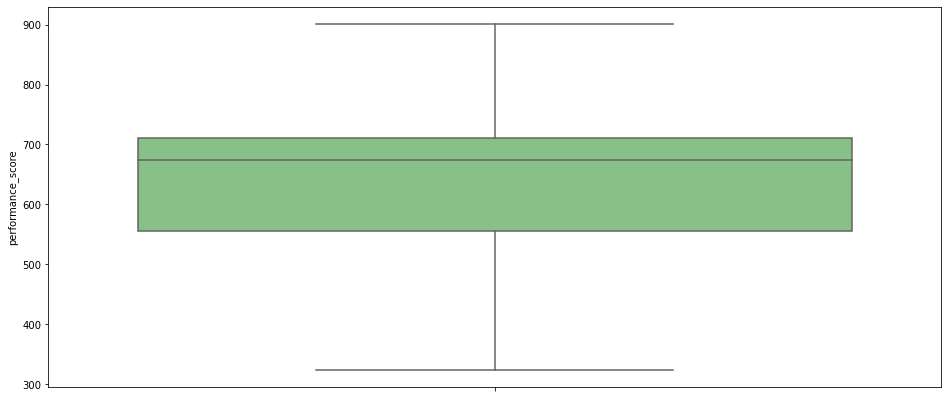

In [203]:
plt.figure(figsize=(16,7))
sns.boxplot(y='performance_score',data=new_employees2,palette='Accent')

In [ ]:
#The outliers in performance score has been handled using caping

## Dummy Encoding on Gender Column

In [208]:
new_employee=new_employees2

In [209]:
new_employee

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000,52857.142857,M,Operations,G3,723.0
S Kumar,20.000,16000.000000,F,Finance,G0,520.0
Jack Morgan,32.000,35000.000000,M,Finance,G2,674.0
Ying Chin,45.000,65000.000000,F,Sales,G3,556.0
Dheeraj Patel,30.000,42000.000000,F,Operations,G2,711.0
Satyam Sharma,37.875,62000.000000,M,Sales,G3,649.0
James Authur,54.000,52857.142857,F,Operations,G3,323.5
Josh Wills,54.000,52000.000000,F,Finance,G3,901.0
Leo Duck,23.000,98000.000000,M,Sales,G4,709.0


In [210]:
new_employee=pd.get_dummies(new_employee,columns=['gender'],drop_first=True)

In [211]:
new_employee

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.000,52857.142857,Operations,G3,723.0,1
S Kumar,20.000,16000.000000,Finance,G0,520.0,0
Jack Morgan,32.000,35000.000000,Finance,G2,674.0,1
Ying Chin,45.000,65000.000000,Sales,G3,556.0,0
Dheeraj Patel,30.000,42000.000000,Operations,G2,711.0,0
Satyam Sharma,37.875,62000.000000,Sales,G3,649.0,1
James Authur,54.000,52857.142857,Operations,G3,323.5,0
Josh Wills,54.000,52000.000000,Finance,G3,901.0,0
Leo Duck,23.000,98000.000000,Sales,G4,709.0,1


## Standard Scaling on the Feature Performance Score

In [212]:
from sklearn.preprocessing import StandardScaler


In [213]:
scaled_features = new_employee.copy()
 
col_names = ['performance_score']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
scaled_features[col_names] = features
print(scaled_features)

                  age        income  department grade  performance_score  \
name                                                                       
Allen Smith    45.000  52857.142857  Operations    G3           0.541644   
S Kumar        20.000  16000.000000     Finance    G0          -0.794729   
Jack Morgan    32.000  35000.000000     Finance    G2           0.219072   
Ying Chin      45.000  65000.000000       Sales    G3          -0.557736   
Dheeraj Patel  30.000  42000.000000  Operations    G2           0.462647   
Satyam Sharma  37.875  62000.000000       Sales    G3           0.054494   
James Authur   54.000  52857.142857  Operations    G3          -2.088312   
Josh Wills     54.000  52000.000000     Finance    G3           1.713440   
Leo Duck       23.000  98000.000000       Sales    G4           0.449481   

               gender_M  
name                     
Allen Smith           1  
S Kumar               0  
Jack Morgan           1  
Ying Chin             0  
Dheeraj

In [215]:
new_employee=scaled_features

In [219]:
new_employee

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.000,52857.142857,Operations,G3,0.541644,1
S Kumar,20.000,16000.000000,Finance,G0,-0.794729,0
Jack Morgan,32.000,35000.000000,Finance,G2,0.219072,1
Ying Chin,45.000,65000.000000,Sales,G3,-0.557736,0
Dheeraj Patel,30.000,42000.000000,Operations,G2,0.462647,0
Satyam Sharma,37.875,62000.000000,Sales,G3,0.054494,1
James Authur,54.000,52857.142857,Operations,G3,-2.088312,0
Josh Wills,54.000,52000.000000,Finance,G3,1.713440,0
Leo Duck,23.000,98000.000000,Sales,G4,0.449481,1


## Visulaizing the data after preprocessing

In [226]:
x=new_employee.drop('gender_M',axis=1)

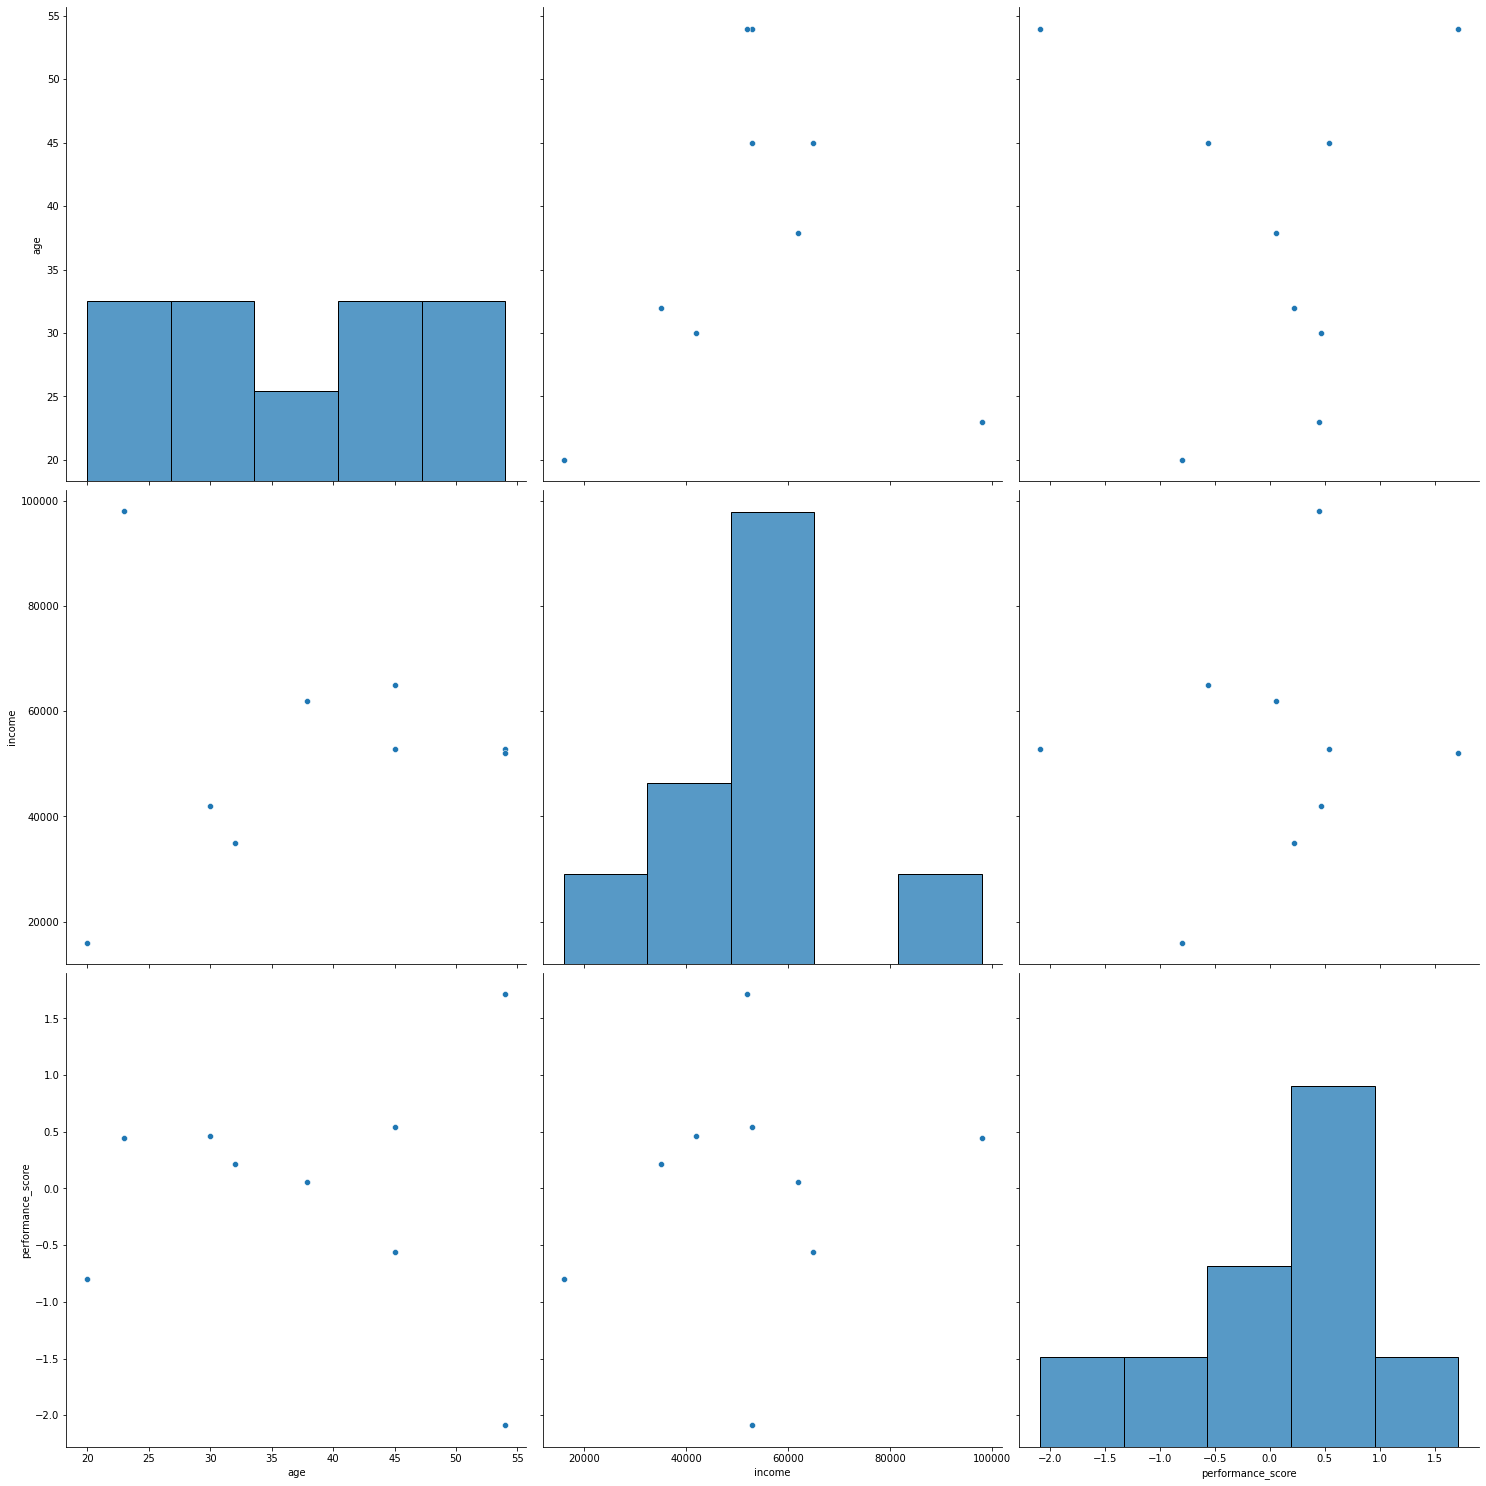

In [242]:
sns.pairplot(data=x,height=7)
